In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(-0.5, 719.5, 809.5, -0.5)

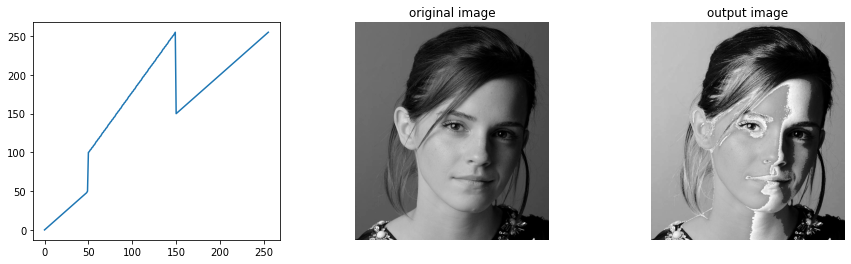

In [9]:
#(1)
im=cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
t1= np.linspace (0,50,50)
t2= np.linspace (100,255,100)
t3= np.linspace (150,255,106)
t= np.concatenate((t1,t2,t3), axis =0).astype(np.uint8)

assert len(t) ==256
g= cv.LUT(im,t)

fig,ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(t)
ax[1].imshow(im,'gray')
ax[1].set_title(r'original image')
ax[1].axis('off')
ax[2].imshow(g,'gray')
ax[2].set_title(r'output image')
ax[2].axis('off')

(-0.5, 180.5, 216.5, -0.5)

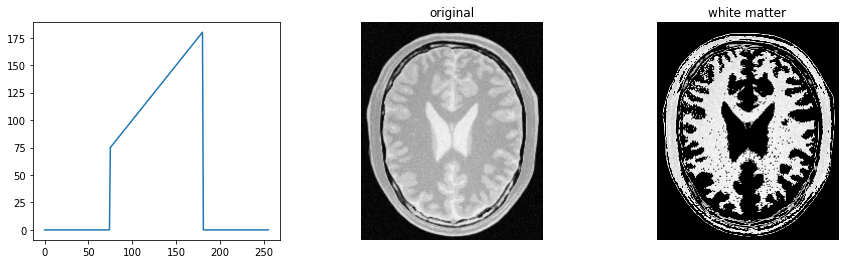

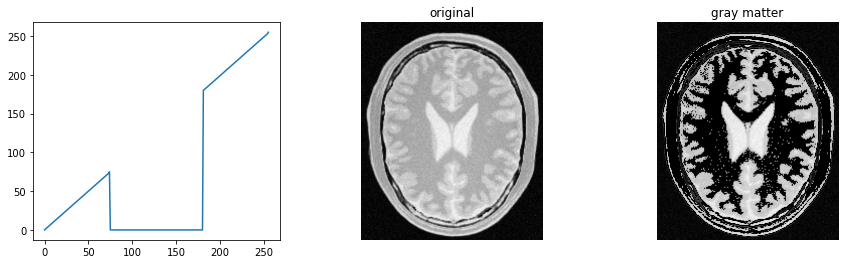

In [10]:
#(2)
im2=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

#(a) white matter
t1= np.linspace (0,0,75)
t2= np.linspace (75,180,106)
t3= np.linspace (0,0,75)
white_t= np.concatenate((t1,t2,t3), axis =0).astype(np.uint8)
assert len(t) ==256
g1= cv.LUT(im2,white_t)

fig,ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(white_t)
ax[1].imshow(im2,'gray')
ax[1].set_title(r'original')
ax[1].axis('off')
ax[2].imshow(g1,'gray')
ax[2].set_title(r'white matter')
ax[2].axis('off')

#(b) gray matter
t4= np.linspace (0,75,75)
t5= np.linspace (0,0,106)
t6= np.linspace (180,255,75)
gray_t= np.concatenate((t4,t5,t6), axis =0).astype(np.uint8)
assert len(t) ==256
g2= cv.LUT(im2,gray_t)

fig,ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(gray_t)
ax[1].imshow(im2,'gray')
ax[1].set_title(r'original')
ax[1].axis('off')
ax[2].imshow(g2,'gray')
ax[2].set_title(r'gray matter')
ax[2].axis('off')

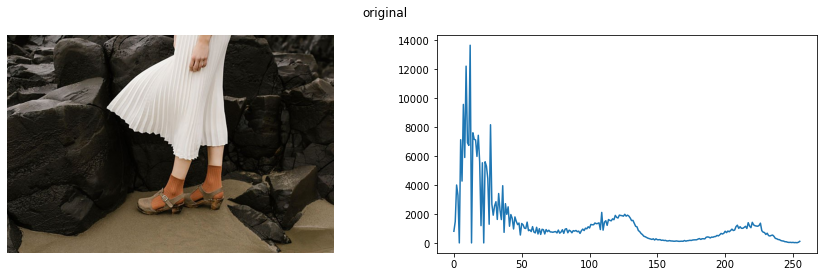

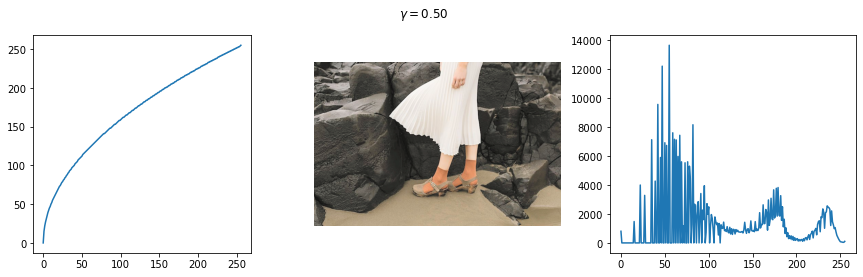

In [11]:
#(3)
im3 = cv.imread(r'highlights_and_shadows.jpg')
assert im3 is not None

im3_Lab = cv.cvtColor(im3, cv.COLOR_BGR2Lab)
L,a,b = im3_Lab[:,:,0],im3_Lab[:,:,1],im3_Lab[:,:,2]
hist_org = cv.calcHist([L], [0], None, [256], [0,256])

fig, ax = plt.subplots(1,2,figsize = (15,4))
fig.suptitle('original')
ax[0].imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[1].plot(hist_org)

gamma = 0.5
lt = np.array([((i/255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)
L2 = cv.LUT(L, lt)
im3_Lab[:,:,0] = L2
hist = cv.calcHist([L2], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(1,3,figsize = (15,4))
fig.suptitle('$ \gamma = %.2f$'%gamma)
ax[0].plot(lt)
ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(im3_Lab, cv.COLOR_Lab2RGB))
ax[1].axis('off')
ax[2].plot(hist)

(-0.5, 499.5, 499.5, -0.5)

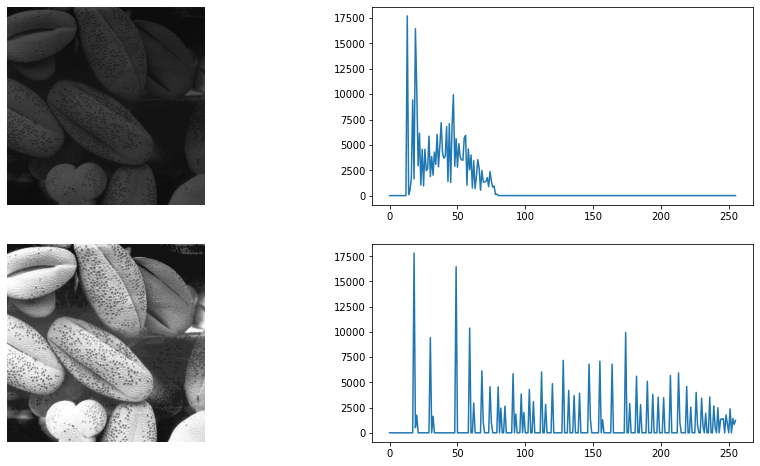

In [14]:
#(4)
im4 = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert im4 is not None

def grayImgEqualize(img):
    M,N = img.shape
    L = 256
    hist = cv.calcHist([img], [0], None, [256], [0,256]) 
    
    lt = []
    sum = 0
    for k in hist:
        sum+=k[0]
        lt.append(round((sum*(L-1))/(M*N)))
    return np.array(lt)

hist_org = cv.calcHist([im4], [0], None, [256], [0,256])

lt =grayImgEqualize(im4)
im_equalized = cv.LUT(im4, lt)
hist = cv.calcHist([im_equalized.astype(np.uint8)], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(2,2,figsize = (15,8))
ax[0][0].imshow(cv.cvtColor(im4, cv.COLOR_GRAY2RGB))
ax[0][0].axis('off')
ax[0][1].plot(hist_org)
ax[1][0].imshow(cv.cvtColor(im_equalized.astype(np.uint8), cv.COLOR_GRAY2RGB))
ax[1][1].plot(hist)
ax[1][0].axis('off')